In [ ]:
!pip install -U mne

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import time, mne

######### Modify BASE_DIR before run this program, 
#     path of sXD_5678.set should be "BASE_DIR/sXD_5678.set"
BASE_DIR = "/content/drive/MyDrive/5275_Lab2_2/"

In [ ]:
raw = mne.io.read_raw_eeglab(BASE_DIR + "sXD_5678.set")
#print(raw.info)
mne.rename_channels(raw.info, mapping = 
    {"FP1": "Fp1", "FP2": "Fp2", 
    "PZ": "Pz", "FZ": "Fz", "CZ": "Cz", 
    "FCZ": "FCz", "CPZ": "CPz", "OZ": "Oz"})
print(raw.ch_names)

Problem 6

Creating RawArray with float64 data, n_channels=33, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<ipython-input-17-93511c30b357>:6: RuntimeWarning: DigMontage is only a subset of info. There are 1 channel position not present in the DigMontage. The required channels are:

['vehicle positio'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  eeg.set_montage(montage_1020, on_missing = "warn")


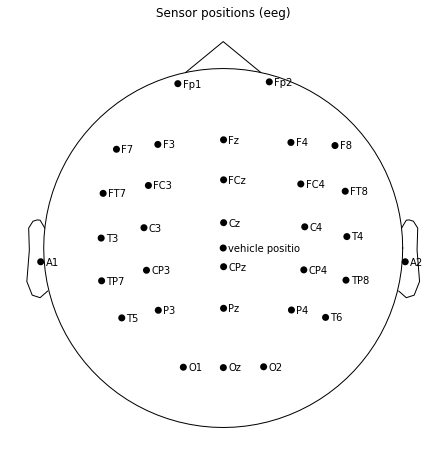

EEG channel type selected for re-referencing
Applying a custom EEG reference.
Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by number: 31 components
Fitting ICA took 126.1s.


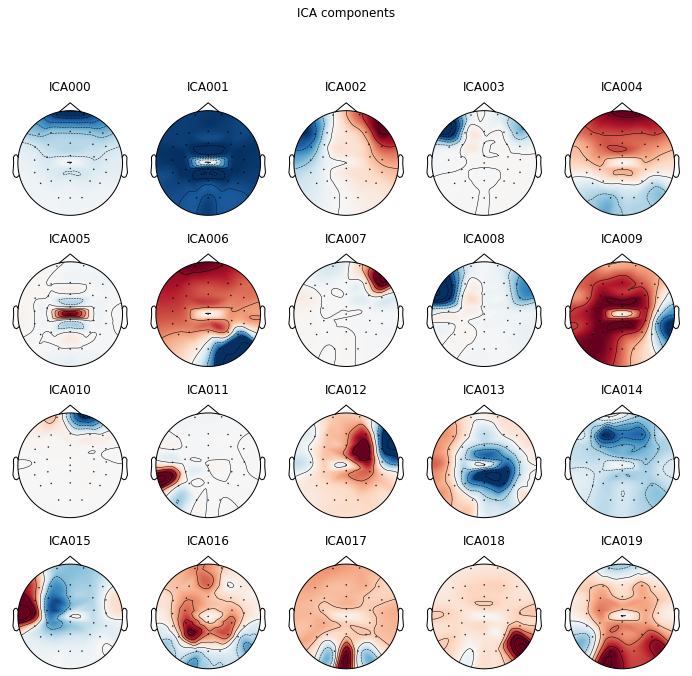

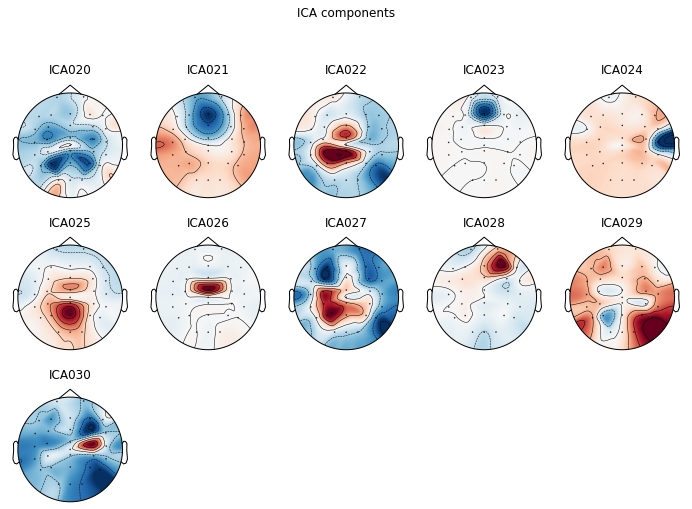

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x526.68 with 11 Axes>]

In [17]:
## Problem 6
eeg = raw.copy()
#eeg.drop_channels(["vehicle positio"])
# plot 2D channel location map
montage_1020 = mne.channels.make_standard_montage("standard_1020")
eeg.set_montage(montage_1020, on_missing = "warn")
eeg.get_montage().plot()
# re-reference data by (A1+A2)/2
refchan = ["A1", "A2"]
mne.set_eeg_reference(eeg, ref_channels = refchan)
# Down-sampling to 250Hz
eeg = eeg.resample(250)
# drop A1,A2
eeg = eeg.drop_channels(refchan)
# Run ICA
ica = mne.preprocessing.ICA(n_components = len(eeg.ch_names))
ica.fit(eeg)
# plot component map
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (31 components)
    Zeroing out 6 ICA components
    Projecting back using 31 PCA components
=> original EEG signal


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


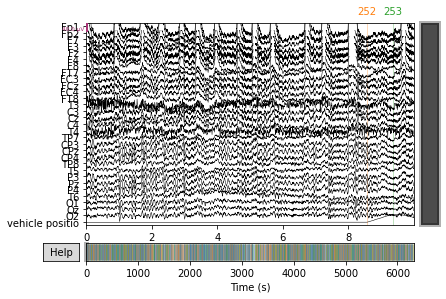

=> EEG signal after ICA


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


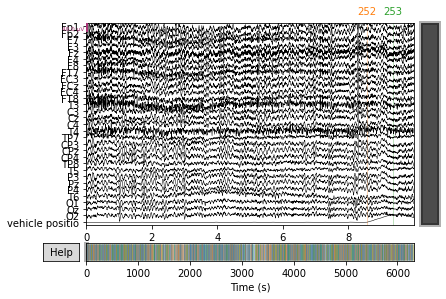

In [18]:
# denoising by ICA
reconstruct = eeg.copy()
ica.exclude = [0, 2, 3, 7, 8, 11]
ica.apply(reconstruct)

# plot the eeg signal
print("=> original EEG signal")
fig1 = eeg.plot(duration = 10.0, n_channels = 33)
print("=> EEG signal after ICA")
fig2 = reconstruct.plot(duration = 10.0, n_channels = 33)

Problem 7

Creating RawArray with float64 data, n_channels=32, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


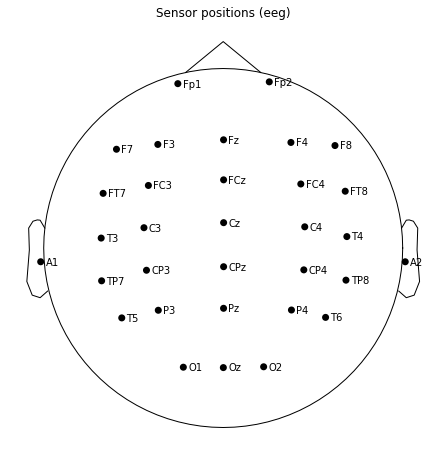

EEG channel type selected for re-referencing
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 827 samples (3.308 sec)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 117.9s.


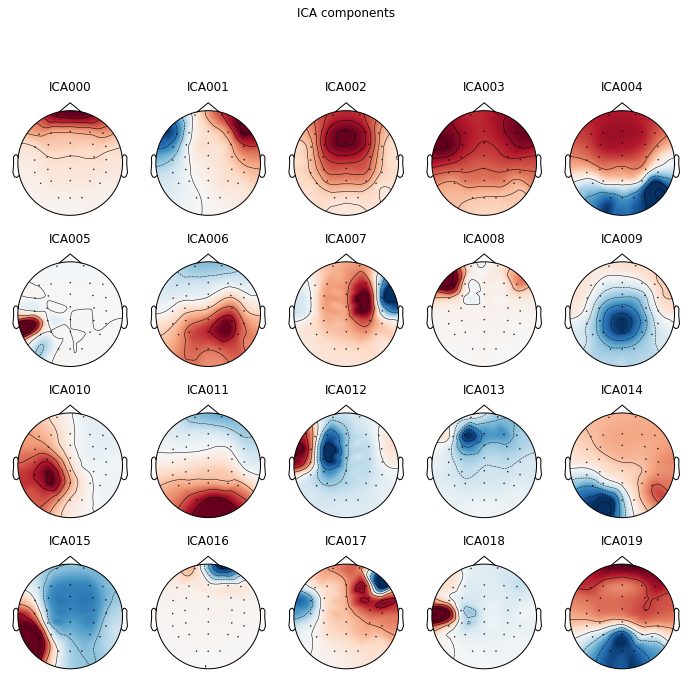

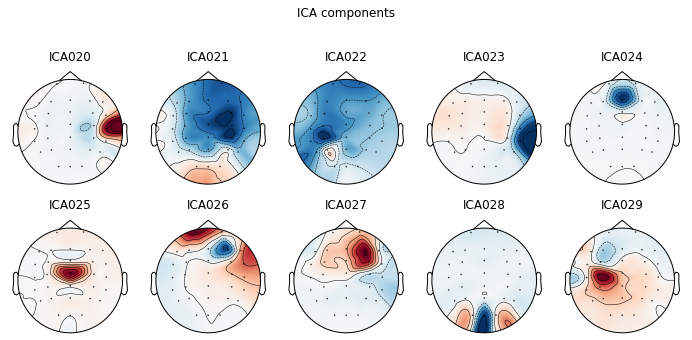

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components
=> original EEG signal


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


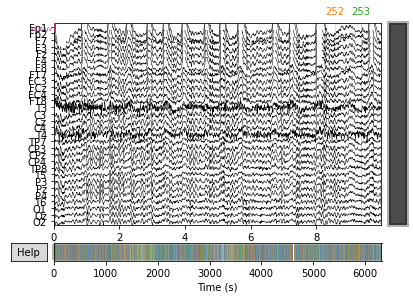

=> EEG signal after ICA


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


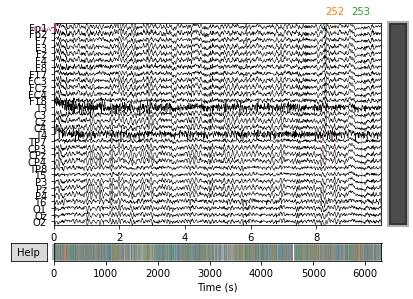

In [22]:
## Problem 7
eeg2 = raw.copy()
eeg2.drop_channels(["vehicle positio"])
# plot 2D channel location map
montage_1020 = mne.channels.make_standard_montage("standard_1020")
eeg2.set_montage(montage_1020, on_missing = "warn")
eeg2.get_montage().plot()
# re-reference data by (A1+A2)/2
refchan = ["A1", "A2"]
mne.set_eeg_reference(eeg2, ref_channels = refchan)
# Down-sampling to 250Hz
eeg2 = eeg2.resample(250)
# Bandpass filtering [1,50] Hz
eeg2 = eeg2.filter(1.0, 50.0, filter_length = 826)
# drop A1,A2
eeg2 = eeg2.drop_channels(refchan)
# Run ICA
ica = mne.preprocessing.ICA(n_components = len(eeg2.ch_names))
ica.fit(eeg2)
# plot component map
ica.plot_components()

# denoising by ICA
reconstruct2 = eeg2.copy()
ica.exclude = [0, 1, 10, 23, 24]
ica.apply(reconstruct2)

# plot the eeg signal
print("=> original EEG signal")
fig1 = eeg2.plot(duration = 10.0, n_channels = 33)
print("=> EEG signal after ICA")
fig2 = reconstruct2.plot(duration = 10.0, n_channels = 33)

Problem 8

Creating RawArray with float64 data, n_channels=30, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


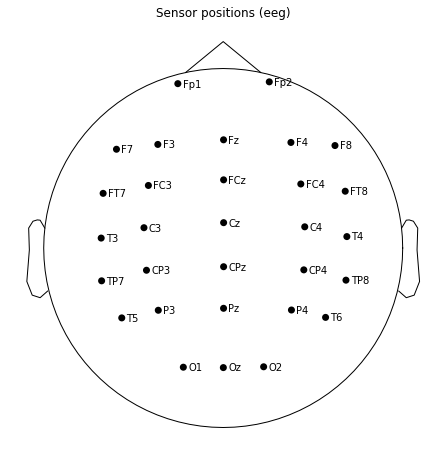

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 827 samples (3.308 sec)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 144.5s.


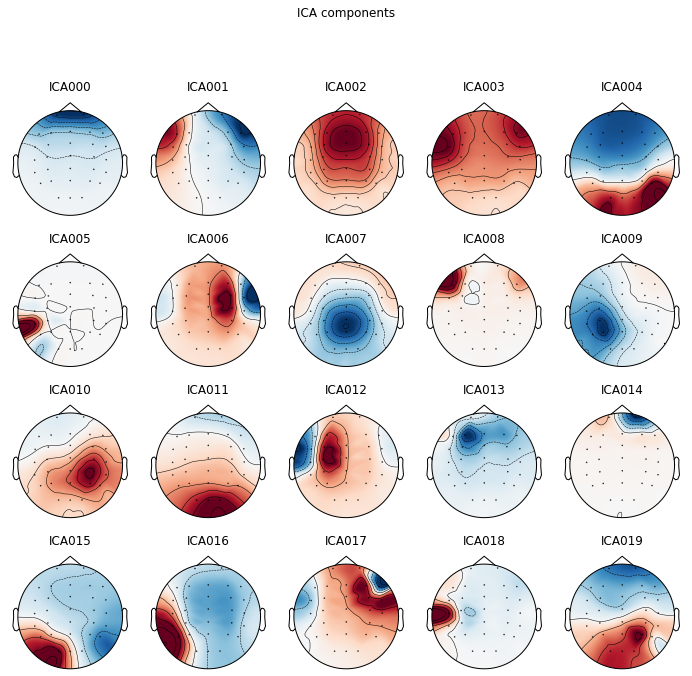

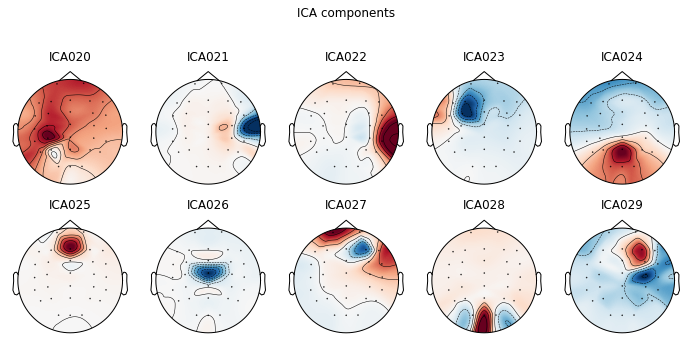

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    5, 26, 8
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
=> original EEG signal


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


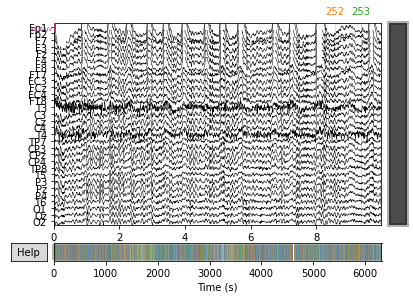

=> EEG signal after ICA


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


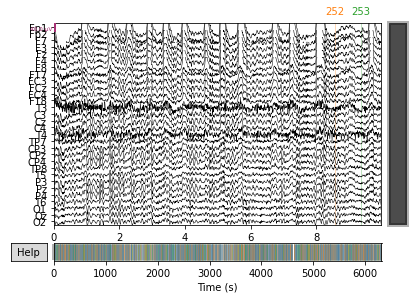

In [23]:
## Problem 8
eeg3 = raw.copy()
eeg3.drop_channels(["vehicle positio", "A1", "A2"])
# plot 2D channel location map
montage_1020 = mne.channels.make_standard_montage("standard_1020")
eeg3.set_montage(montage_1020, on_missing = "warn")
eeg3.get_montage().plot()
# re-reference data by avg
mne.set_eeg_reference(eeg3, ref_channels = "average")
# Down-sampling to 250Hz
eeg3 = eeg3.resample(250)
# Bandpass filtering [1,50] Hz
eeg3 = eeg3.filter(1.0, 50.0, filter_length = 826)
ica = mne.preprocessing.ICA(n_components = len(eeg3.ch_names))
ica.fit(eeg3)
# plot component map
ica.plot_components()

# denoising by ICA
reconstruct3 = eeg3.copy()
# detect_artifact() automatic pick bad components
ica_clean = ica.detect_artifacts(eeg3)
ica_clean.apply(reconstruct3)

# plot the eeg signal
print("=> original EEG signal")
fig1 = eeg3.plot(duration = 10.0, n_channels = 33)
print("=> EEG signal after ICA")
fig2 = reconstruct3.plot(duration = 10.0, n_channels = 33)